In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def build_lagrangian_basis(q, e):
    n_q_points = q.shape[0]
    n_e_points = e.shape[0]
    
    basis = np.ones((n_e_points, n_q_points), dtype=np.float64)
    
    for i in range(n_e_points):
        for j in range(n_q_points):
            for k in range(n_q_points):
                if k == j:
                    continue
                basis[i, j] *= (e[i] - q[k]) / (q[j] - q[k])
                
    return basis

In [3]:
e = np.linspace(0, 1, 100)
q = np.linspace(0, 1,   4)

In [4]:
def interpolate(f, q, e):
    n_q_points = q.shape[0]
    n_e_points = e.shape[0]
    
    basis = build_lagrangian_basis(q, e)
    
    f_e = np.zeros((n_e_points, ), dtype=np.float64)
    
    for i in range(n_e_points):
        for j in range(n_q_points):
            f_e[i] += basis[i, j] * f(q[j])
            
    return f_e

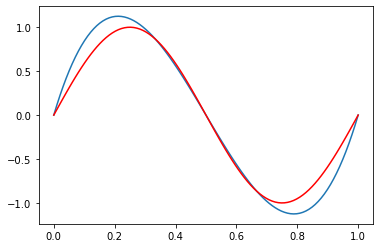

In [5]:
f = lambda x: np.sin(2 * np.pi * x)
f_interp = interpolate(f, q, e)
plt.plot(e, f_interp)
plt.plot(e, f(e), color="red")

In [6]:
def build_lagrangian_basis_2d(q_x, q_y, e_x, e_y):
    n_q_x_points = q_x.shape[0]
    n_q_y_points = q_y.shape[0]
    n_e_x_points = e_x.shape[0]
    n_e_y_points = e_y.shape[0]
    
    basis_shape = (n_e_x_points, n_e_y_points, n_q_x_points, n_q_y_points)
    basis = np.zeros(basis_shape, dtype=np.float64)
    
    bx = build_lagrangian_basis(q_x, e_x)
    by = build_lagrangian_basis(q_y, e_y)
    
    #for i in range(n_e_x_points):
    #    for j in range(n_e_y_points):
    #        for k in range(n_q_x_points):
    #            for l in range(n_q_y_points):
    #                basis[i, j, k, l] = bx[i, k] * by[j, l]
    
    bx_r = bx.reshape((n_e_x_points, 1, n_q_x_points, 1))
    by_r = by.reshape((1, n_e_y_points, 1, n_q_y_points))
    
    basis = bx_r * by_r
    
    return basis

In [7]:
q_x = np.linspace(0, 1, 10)
q_y = np.linspace(0, 1, 10)
e_x = np.linspace(0, 1, 25)
e_y = np.linspace(0, 1, 27)

In [8]:
build_lagrangian_basis_2d(q_x, q_y, e_x, e_y).shape

(25, 27, 10, 10)

In [29]:
def interpolate_2d(f, q_x, q_y, e_x, e_y):
    n_q_x_points = q_x.shape[0]
    n_q_y_points = q_y.shape[0]
    n_e_x_points = e_x.shape[0]
    n_e_y_points = e_y.shape[0]
    
    f_e = np.zeros((n_e_x_points, n_e_y_points), dtype=np.float64)
    X, Y = np.meshgrid(q_x, q_y)
    f_q = f(Y, X)
    
    basis = build_lagrangian_basis_2d(q_x, q_y, e_x, e_y)
      
    for i in range(n_e_x_points):
        for j in range(n_e_y_points):
            for k in range(n_q_x_points):
                for l in range(n_q_y_points):
                    print(f(q_x[k], q_y[l]) == f_q[k, l])
                    f_e[i, j] += basis[i, j, k, l] * f(q_x[k], q_y[l])
                    
    return f_e

In [30]:
f_2d = lambda x, y: np.sin(2 * np.pi * x) + y ** 2
f_2d_interp = interpolate_2d(f_2d, q_x, q_y, e_x, e_y)

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [15]:
# Check the errors on a grid
X, Y = np.meshgrid(e_x, e_y)
i, j = np.meshgrid(range(e_x.shape[0]), range(e_y.shape[0]))
np.max(np.abs(f_2d(X,Y) - f_2d_interp[i,j]))

6.787240547706519e-05

In [16]:
f_2d(*np.meshgrid(e_x, e_y))

array([[ 0.00000000e+00,  2.58819045e-01,  5.00000000e-01,
         7.07106781e-01,  8.66025404e-01,  9.65925826e-01,
         1.00000000e+00,  9.65925826e-01,  8.66025404e-01,
         7.07106781e-01,  5.00000000e-01,  2.58819045e-01,
         1.22464680e-16, -2.58819045e-01, -5.00000000e-01,
        -7.07106781e-01, -8.66025404e-01, -9.65925826e-01,
        -1.00000000e+00, -9.65925826e-01, -8.66025404e-01,
        -7.07106781e-01, -5.00000000e-01, -2.58819045e-01,
        -2.44929360e-16],
       [ 1.47928994e-03,  2.60298335e-01,  5.01479290e-01,
         7.08586071e-01,  8.67504694e-01,  9.67405116e-01,
         1.00147929e+00,  9.67405116e-01,  8.67504694e-01,
         7.08586071e-01,  5.01479290e-01,  2.60298335e-01,
         1.47928994e-03, -2.57339755e-01, -4.98520710e-01,
        -7.05627491e-01, -8.64546114e-01, -9.64446536e-01,
        -9.98520710e-01, -9.64446536e-01, -8.64546114e-01,
        -7.05627491e-01, -4.98520710e-01, -2.57339755e-01,
         1.47928994e-03],
    